# Capstone 3: Predicting Customer Lifetime Value (CLV)

## Predicting Customer Lifetime Value (CLV) to Optimize Targeted Marketing Strategies in E-Commerce

This capstone project aims to enhance targeted marketing strategies in the e-commerce sector by accurately predicting CLV for the largest online department store in Brazil, encompassing 100,000 anonymized orders made between 2016 and 2018.

Target feature: `customer_total_spend_monetary`

## EXPLORATORY DATA ANALYSIS (EDA)

## Table of Contents
* [About These DataFrames](#about_dataframes)
* [Visualizations](#visualizations)   
    *  [Histograms](#histograms)
    *  [Boxplots](#boxplots)
    *  [Pairplots](#pairplots)
    *  [Correlation Heatmap](#correlation_heatmap)
    *  [RFM Analysis](#rfm_analysis)
    *  [Revenue Contribution by Top Customers](#revenue_contribution)
    *  [Total Spend Over Time](#total_spend_over_time)
    *  [Order Volume Over Time](#order_volume_over_time)
    *  [Preferred Payment Distribution](#preferred_payment)
* [Summary](#summary)

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import io
from IPython.display import display_html
import plotly.express as px
import json
import requests


In [2]:
from google.colab import drive
drive.mount('/content/drive')

import shutil  # Make sure to import the shutil module

Mounted at /content/drive


In [4]:
# Define the directory and map filenames to desired variable names
directory = '/content/drive/My Drive/Colab Notebooks/'
filenames_to_vars = {'df_clv_clean.csv': 'clv', 'df_clean.csv': 'df'}

# Dictionary to store the DataFrames
dataframes = {}

# Loop through filenames and load each CSV into a dynamically named DataFrame
for filename, var_name in filenames_to_vars.items():
    file_path = os.path.join(directory, filename)
    if os.path.exists(file_path):
        globals()[var_name] = pd.read_csv(file_path)
        print(f"Loaded {filename} into DataFrame '{var_name}'")
    else:
        print(f"File {filename} does not exist at {file_path}")

Loaded df_clv_clean.csv into DataFrame 'clv'
Loaded df_clean.csv into DataFrame 'df'


## About These DataFrames <a class="anchor" id="about_dataframes"></a>

We now have a DataFrame that holds all of the features related to Customer Lifetime Value.

`customer_total_spend_monetary` will be our target variable for subsequent modeling.

We will use the original e-commerce DataFrame (df) and the customer lifetime value DataFrame (clv) to explore the data.

In [5]:
# Capture the text output of `df.info()` using `StringIO` and create a HTML layout to display these outputs side by side.

# Capture the output of df.info() as a string.
def capture_info(df):
  buffer = io.StringIO()
  df.info(buf=buffer)
  return buffer.getvalue()

# Capture the info of both DataFrames
info1 = capture_info(df)
info2 = capture_info(clv)

# Function to display side by side in Jupyter Notebook
def display_side_by_side(info1, info2):
    html_str = f"""
    <div style="display: flex;">
        <div style="margin-right: 20px;">
            <pre>{info1}</pre>
        </div>
        <div>
            <pre>{info2}</pre>
        </div>
    </div>
    """
    display_html(html_str, raw=True)

# Display the .info() of both DataFrames side by side
display_side_by_side(info1, info2)

RangeIndex: 113367 entries, 0 to 113366
Data columns (total 33 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 Unnamed: 0 113367 non-null int64 
 1 customer_id 113367 non-null object 
 2 customer_unique_id 113367 non-null object 
 3 customer_zip_code_prefix 113367 non-null int64 
 4 customer_city 113367 non-null object 
 5 customer_state 113367 non-null object 
 6 order_id 113367 non-null object 
 7 order_status 113367 non-null object 
 8 order_purchase_timestamp 113367 non-null object 
 9 order_approved_at 113367 non-null object 
 10 order_delivered_carrier_date 113367 non-null object 
 11 order_delivered_customer_date 113367 non-null object 
 12 order_estimated_delivery_date 113367 non-null object 
 13 order_item_id 113367 non-null int64 
 14 product_id 113367 non-null object 
 15 seller_id 113367 non-null object 
 16 shipping_limit_date 113367 non-null object 
 17 price 113367 non-null float64
 18 freight_value 113367 non-null float64
 19 product_name_lenght 113367 non-null float64
 20 product_description_lenght 113367 non-null float64
 21 product_photos_qty 113367 non-null float64
 22 product_weight_g 113367 non-null float64
 23 product_length_cm 113367 non-null float64
 24 product_height_cm 113367 non-null float64
 25 product_width_cm 113367 non-null float64
 26 payment_sequential 113367 non-null int64 
 27 payment_type 113367 non-null object 
 28 payment_installments 113367 non-null int64 
 29 payment_value 113367 non-null float64
 30 product_category 113367 non-null object 
 31 delivery_time_days 113367 non-null int64 
 32 on_time_delivery 113367 non-null bool 
dtypes: bool(1), float64(10), int64(6), object(16)
memory usage: 27.8+ MB
 
 
 
 
RangeIndex: 92062 entries, 0 to 92061
Data columns (total 17 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 Unnamed: 0 92062 non-null int64 
 1 customer_unique_id 92062 non-null object 
 2 customer_average_order_value 92062 non-null float64
 3 customer_tenure_days 92062 non-null int64 
 4 customer_recency_days 92062 non-null int64 
 5 customer_total_orders_frequency 92062 non-null int64 
 6 customer_total_spend_monetary 92062 non-null float64
 7 customer_unique_products 92062 non-null int64 
 8 customer_category_diversity 92062 non-null int64 
 9 customer_average_product_price 92062 non-null float64
 10 customer_total_units 92062 non-null int64 
 11 customer_average_delivery_time 92062 non-null float64
 12 customer_average_shipping_cost 92062 non-null float64
 13 customer_on_time_delivery_rate 92062 non-null float64
 14 customer_preferred_payment_type 92062 non-null object 
 15 customer_average_installments 92062 non-null float64
 16 customer_total_payment_transactions 92062 non-null int64 
dtypes: float64(7), int64(8), object(2)
memory usage: 11.9+ MB

In [6]:
clv.describe()

,Unnamed: 0,customer_average_order_value,customer_tenure_days,customer_recency_days,customer_total_orders_frequency,customer_total_spend_monetary,customer_unique_products,customer_category_diversity,customer_average_product_price,customer_total_units,customer_average_delivery_time,customer_average_shipping_cost,customer_on_time_delivery_rate,customer_average_installments,customer_total_payment_transactions
count,92062.000000,92062.000000,92062.000000,92062.000000,92062.000000,92062.000000,92062.000000,92062.000000,92062.000000,92062.000000,92062.000000,92062.000000,92062.000000,92062.000000,92062.000000
mean,46030.500000,204.859720,2.607254,236.241120,1.033097,212.077653,1.068302,1.025027,125.861638,1.231420,12.097634,20.219815,0.918641,2.905271,1.342182
std,26576.154578,621.011598,24.824275,152.570422,0.206880,643.667355,0.314754,0.167547,190.103261,0.818109,9.546905,15.746163,0.271978,2.681864,3.840764
min,0.000000,9.590000,0.000000,0.000000,1.000000,9.590000,1.000000,1.000000,0.850000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,23015.250000,63.120000,0.000000,113.000000,1.000000,63.830000,1.000000,1.000000,42.900000,1.000000,6.000000,13.370000,1.000000,1.000000,1.000000
50%,46030.500000,110.042500,0.000000,217.000000,1.000000,112.810000,1.000000,1.000000,79.000000,1.000000,10.000000,16.430000,1.000000,2.000000,1.000000
75%,69045.750000,196.010000,0.000000,345.000000,1.000000,202.137500,1.000000,1.000000,139.900000,1.000000,15.000000,21.230000,1.000000,4.000000,1.000000
max,92061.000000,109312.640000,633.000000,694.000000,14.000000,109312.640000,13.000000,5.000000,6735.000000,75.000000,209.000000,409.680000,1.000000,24.000000,771.000000


### Histograms <a id="histograms"></a>

The histograms of our CLV data reveal the following:
- There is a heavy concentration of low-frequency buyers and most customers tend to have low average order values and total spend.

- Customers generally buy a limited variety of products and categories.

- Delivery times and shipping costs are generally favorable, with most customers experiencing quick deliveries and low shipping costs. However, there is a small segment experiencing higher costs and longer delivery times.

- The high on-time delivery rate for most customers is a positive indicator of logistics and fulfillment performance.

- Few customers use installments and the total number of payment transactions is low indicating limited use of financing options.

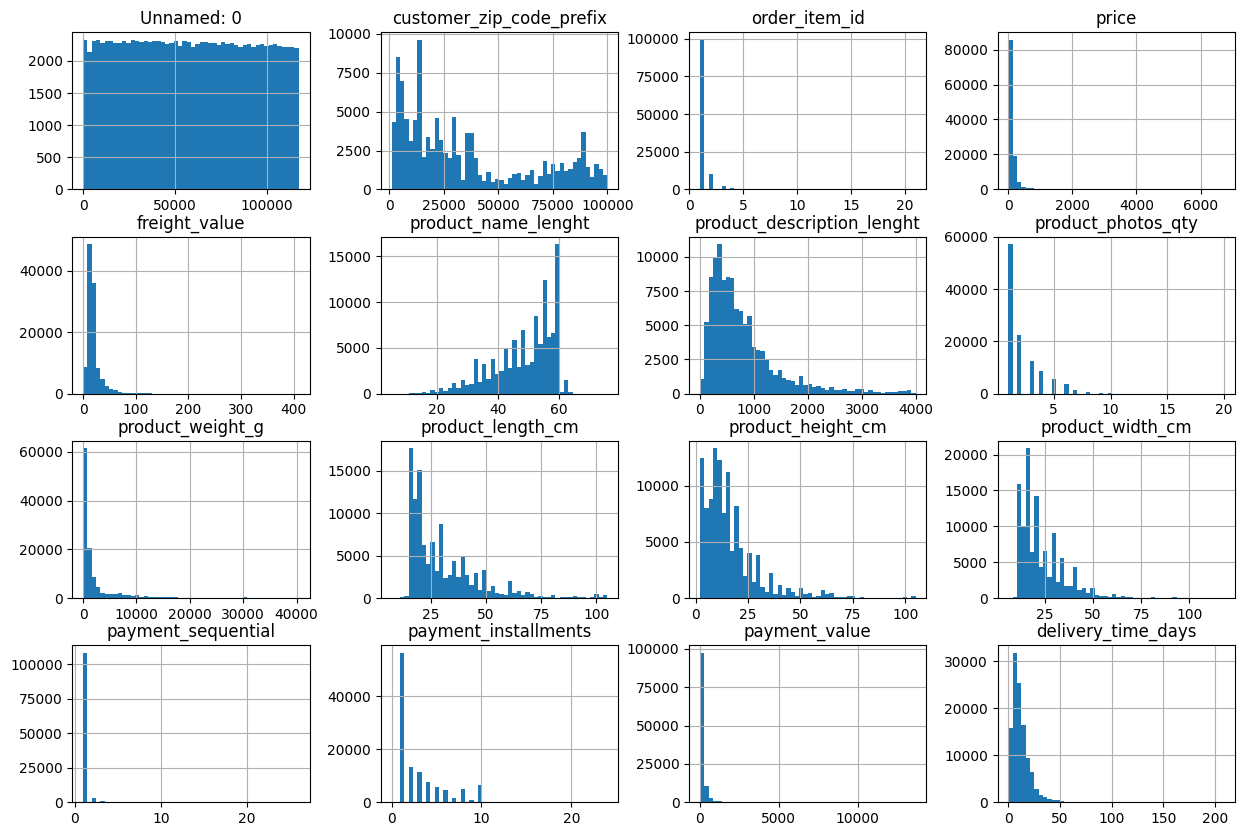

In [7]:
# Plot histograms
df.hist(bins=50, figsize=(15, 10))
plt.show()

### Boxplots <a id="boxplots"></a>

Now, for a deeper dive, let's look at the boxplots of these features.

- **Outliers:** Almost all features show several outliers, indicating there are exceptional cases in every aspect of customer behavior.

- **Skewness:** Most features appear to be right-skewed with a higher concentration of data points at lower values and a few customers or transactions exhibiting much higher values.

- **Spread:** The spread of most features is large, suggesting significant variance in customer behavior and spending patterns.

In particular,
- `customer_tenure_days` shows the majority of customer tenures are lower, indicating that most customers haven't been with the e-commerce site for a very long period.

- `customer_recency_days` shows that the majority of customers made their most recent purchase between approximately 100 to 350 days prior.

- `custmore_unique_products` reveals a high concentration at lower values, indicating limited diversity in products purchased by most customers.

- `customer_average_product_price` has several outliers indicating some customers consistently buy higher-priced products.


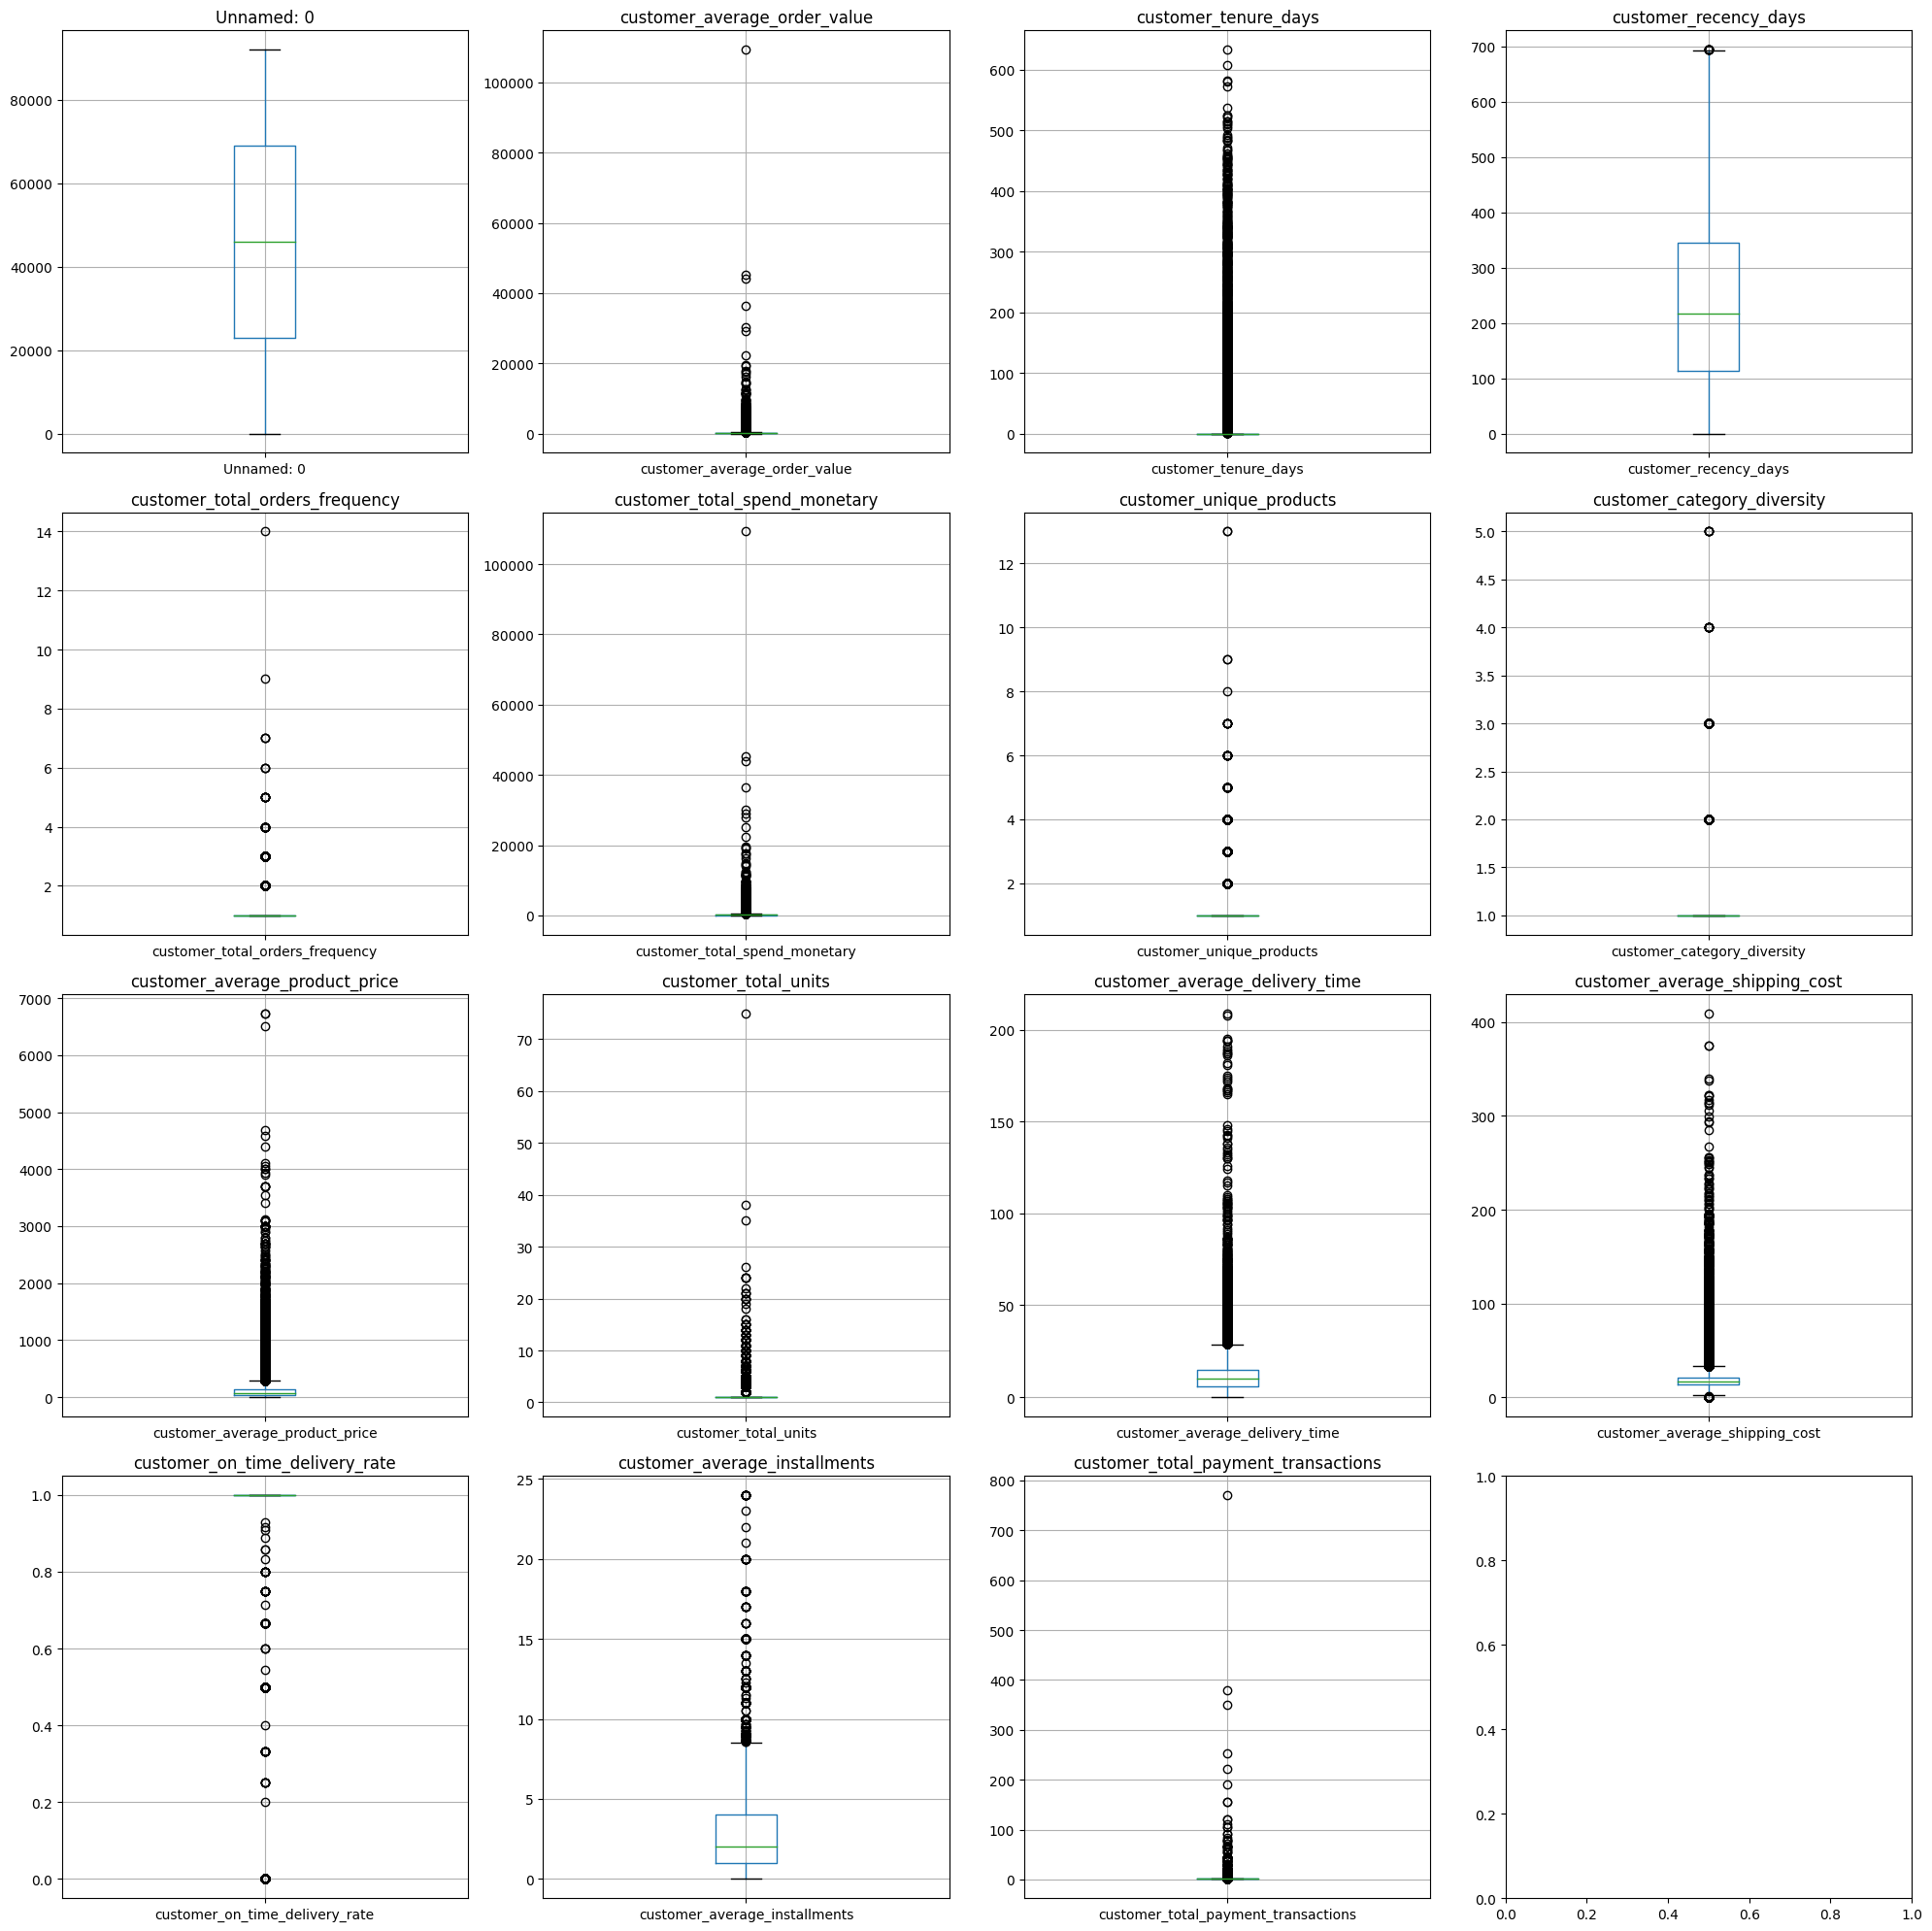

In [8]:
# Select datatypes
numerical_columns = clv.select_dtypes(include=['float64', 'int64']).columns

# Set up the layout
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Create boxplots for each numerical column
for i, col in enumerate(numerical_columns):
    clv.boxplot(column=col, ax=axes[i])
    axes[i].set_title(col)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

### Pairplots <a id="pairplots"></a>

Let's look at the relationships between pairs of our features.

- We see a strong linear relationship between `customer_total_spend_monetary` and `customer_average_order_value`, which makes sense as total spend is partly dependent on the average order value.

- `customer_recency_days` shows no clear relationship with any of the other variables: How recent a customer is does not have a straightforward influence on the number of orders they make.

- There seems to be some positive correlation between `customer_total_orders_frequency` and both `customer_total_spend_monetary` and `customer_average_order_value`. However, the correlation is not as strong as between `customer_total_spend_monetary` and `customer_average_order_value`.

- The diagonal plots of `customer_average_order_value` and `customer_total_spend_monetary` show a right-skewed distribution, suggesting most customers have lower average order values and total spending, with a few customers having very high values in these metrics.

- `customer_total_orders_frequency` also shows a distribution with most customers having lower order frequencies, while fewer customers have very high order frequencies.

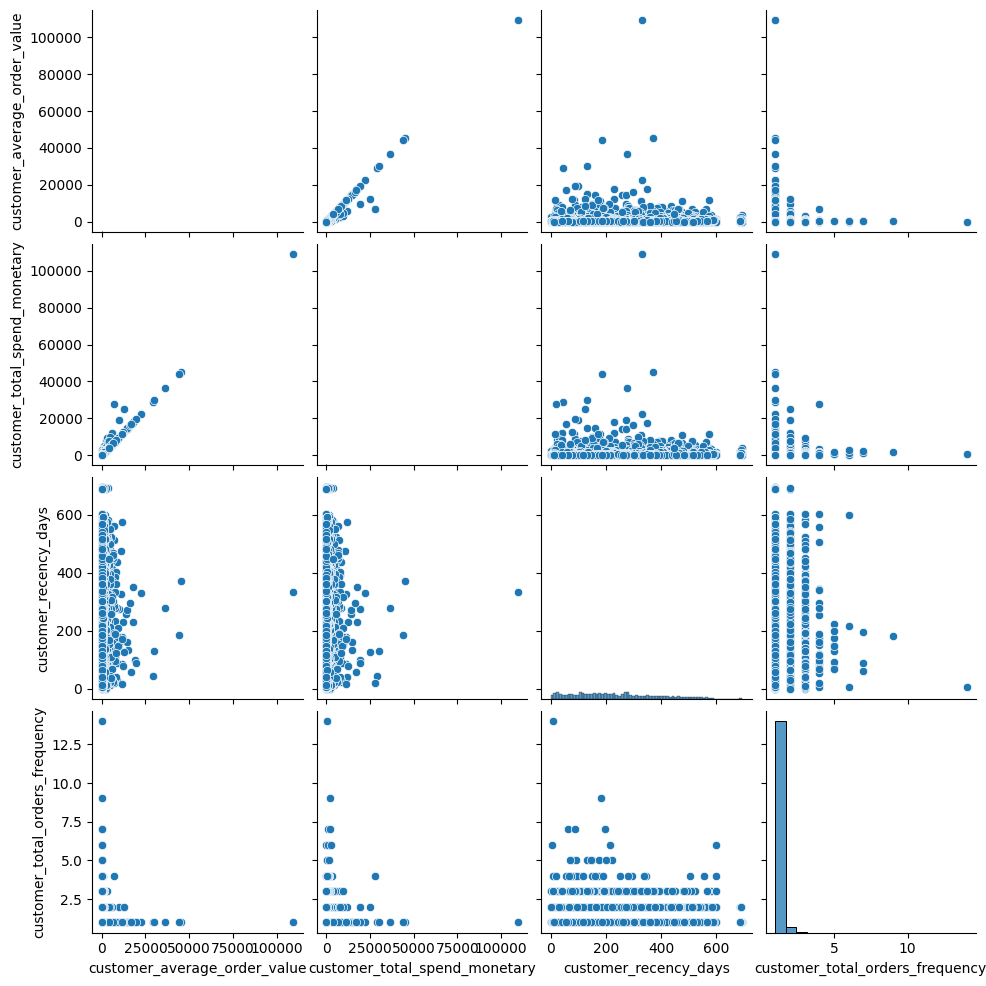

In [9]:
# Pairplots
sns.pairplot(clv[['customer_average_order_value', 'customer_total_spend_monetary', 'customer_recency_days','customer_total_orders_frequency']])
plt.show()

### Correlation Heatmap <a id="correlation_heatmap"></a>

Now let's visualize how strong these correlations are using a correlation heatmap.

**Positive Correlations**

- Logically, we see that as the average order value and the more total units purchased increases, the total spend also increases.

- There is some correlation between customers with longer tenure showing higher category diversity.

**Negative Correlations**

- Higher category diversity is associated with less frequent orders.

**Moderate Correlations**

- The the higher the total units are, the higher their total expenditure tends to be, though the relationship is not overwhelmingly strong.

- Customers with higher tenure days tend to have a higher frequency of total orders.

- Customers who purchase more unique products tend to have higher total spend.

Note: The high correlation between `customer_average_order_value` and `customer_total_spend_monetary` is indicative of high collinearity, which can be problematic because it can make it difficult to determine the individual effect of each predictor on the response variable. Later, we will need to take steps to mitigate the effects of high collinearity in our predictive model.


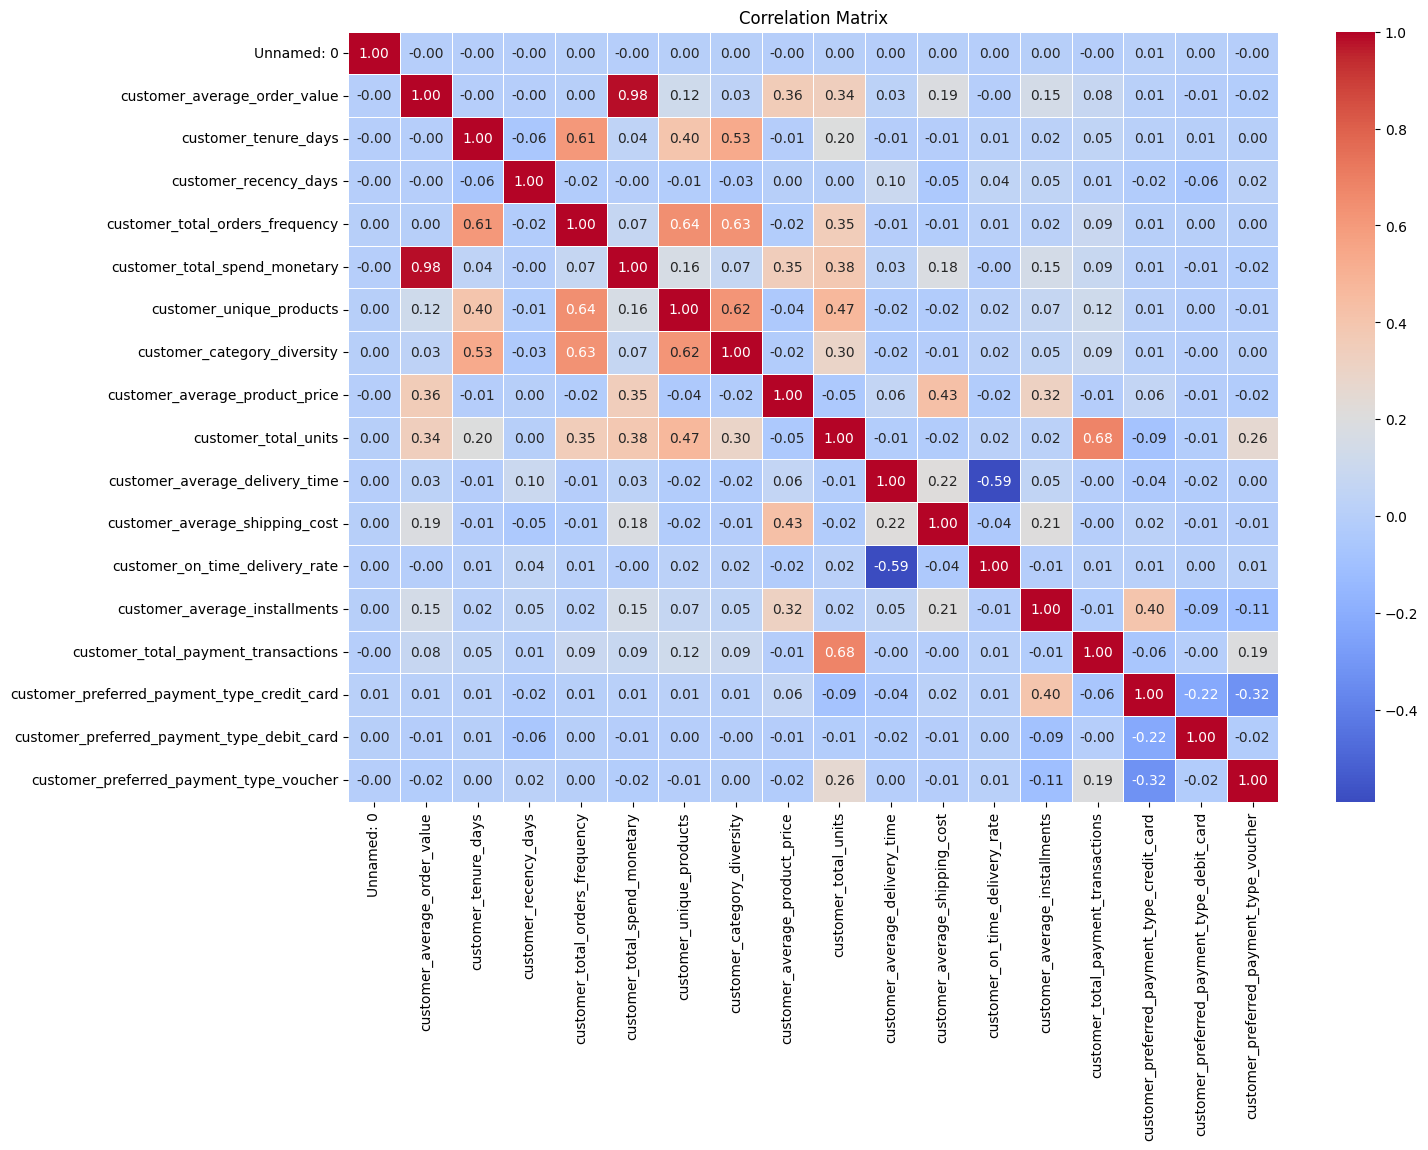

In [10]:
# One-hot encode the 'customer_preferred_payment_type' column
df_encoded = pd.get_dummies(clv, columns=['customer_preferred_payment_type'], drop_first=True)

# Drop the 'customer_unique_id' column as it's not needed for correlation
df_encoded = df_encoded.drop(['customer_unique_id'], axis=1)

# Compute the correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

### RFM Analysis <a id="rfm_analysis"></a>

Here is a scatter plot depicting the relationship between recency (the number of days since the last purchase) and frequency (the number of purchases made). Additionally, it uses color intensity and bubble size to indicate monetary (total spend).

- Most customers have a relatively low frequency of purchases, with a majority making between 1 and 3 purchases.

- Customers with higher frequency (more than 3 purchases) are considerably fewer in number, though there are some notable outliers with up to 14 purchases.



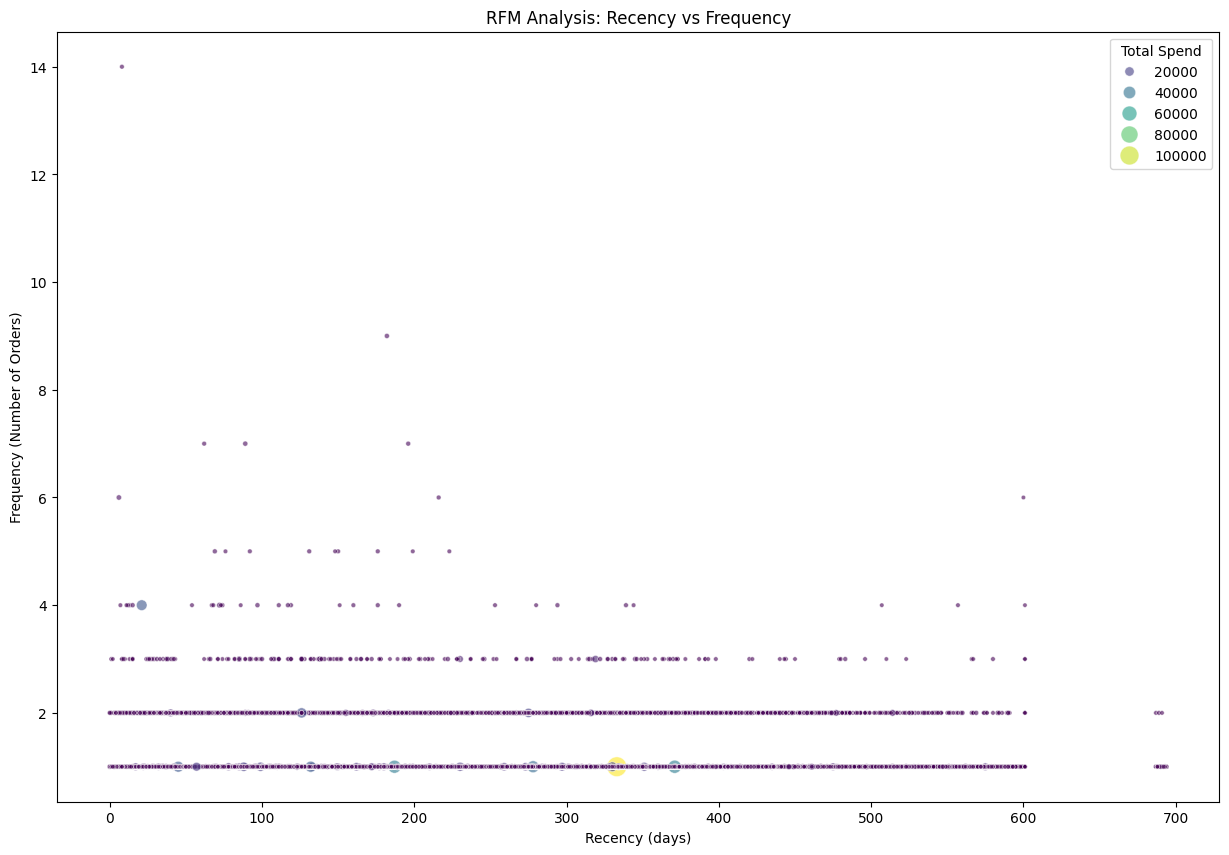

In [11]:
# RFM Analysis
plt.figure(figsize=(15, 10))
sns.scatterplot(data=clv, x='customer_recency_days', y='customer_total_orders_frequency', hue='customer_total_spend_monetary', palette='viridis', size='customer_total_spend_monetary', sizes=(10, 200), alpha=0.6, edgecolor="w", linewidth=0.5)
plt.title('RFM Analysis: Recency vs Frequency')
plt.xlabel('Recency (days)')
plt.ylabel('Frequency (Number of Orders)')
plt.legend(title='Total Spend')
plt.show()


### Revenue Contribution by Top Customers <a id="revenue_contribution"></a>

Below, we divide customers into a cumulative percentage of total revenue, where the x-axis is customers sorted by spend and the y-axis is the cumulative percentage of total revenue: The top 20% of customers contribute to a significant portion of total revenue, which is commonly known as the 80/20 rule (or Pareto Principle).

Revenue is concentrated within the vertical and horizontal red dashed line:
- The red dashed vertical line at around 20% on the x-axis denotes the top 20% of customers.

- The red dashed horizontal line at around 80% on the y-axis indicates that these customers are contributing to approximately 80% of the total revenue.

This small portion of customers (top 20%) are contributing to a large portion of revenue (around 80%).

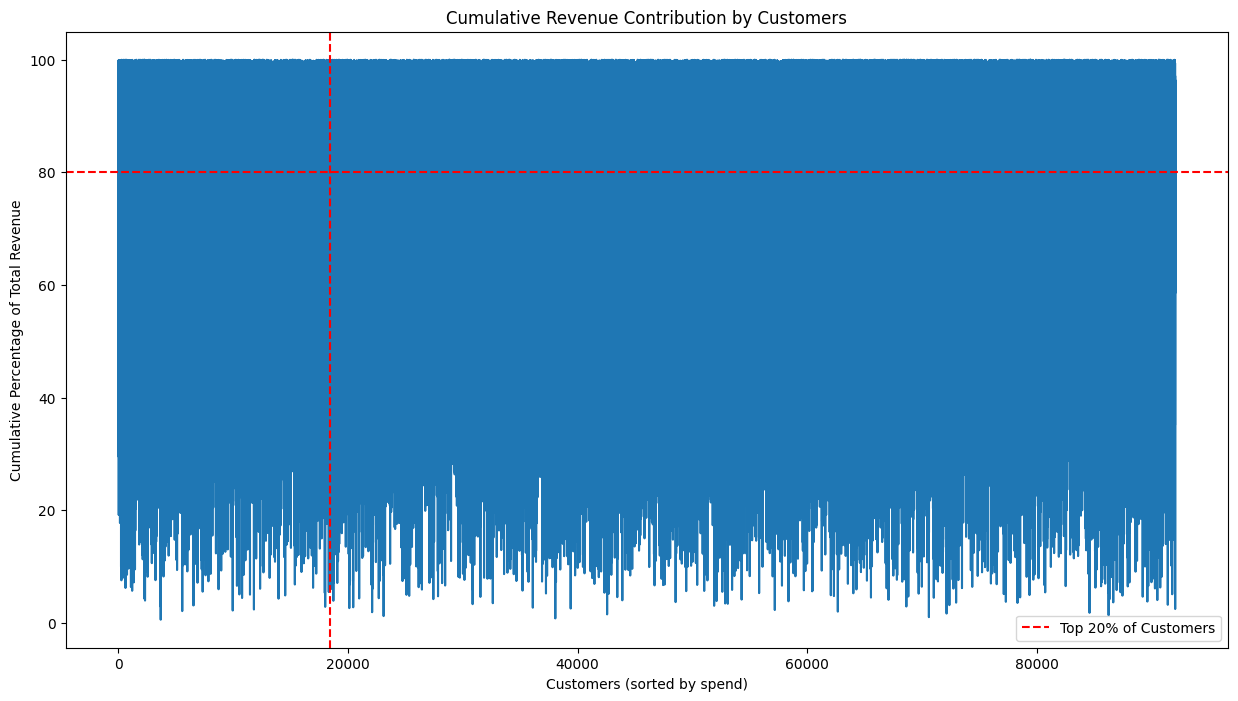

In [12]:
# Revenue Contribution by Top Customers (Pareto Chart)
revenue_by_customer = clv[['customer_unique_id', 'customer_total_spend_monetary']]
revenue_by_customer = revenue_by_customer.sort_values(by='customer_total_spend_monetary', ascending=False)
revenue_by_customer['cum_percentage'] = 100 * revenue_by_customer['customer_total_spend_monetary'].cumsum() / revenue_by_customer['customer_total_spend_monetary'].sum()

plt.figure(figsize=(15, 8))
sns.lineplot(data=revenue_by_customer, x=revenue_by_customer.index, y='cum_percentage')
plt.title('Cumulative Revenue Contribution by Customers')
plt.xlabel('Customers (sorted by spend)')
plt.ylabel('Cumulative Percentage of Total Revenue')

plt.axhline(y=80, color='r', linestyle='--')
plt.axvline(x=int(len(revenue_by_customer) * 0.20), color='r', linestyle='--', label='Top 20% of Customers')
plt.legend()

plt.show()

### Total Spend Over Time <a id="total_spend_over_time"></a>

We see that the total spend generally fluctuates over time with varying peaks and troughs.

There are several notable spending spikes, which might be due to factors such as marketing campaigns, seasonality, product launches, or other external influences like promotions and discounts:

- A significant spike before mid-2017.

- Another apparent spike around mid-2017.

- The most remarkable spike occurs around mid-2018, where the total spend reaches over 100,000 units.

Outside of the spikes, the baseline total spend seems relatively consistent, with minor fluctuations.

<Figure size 1500x1000 with 0 Axes>

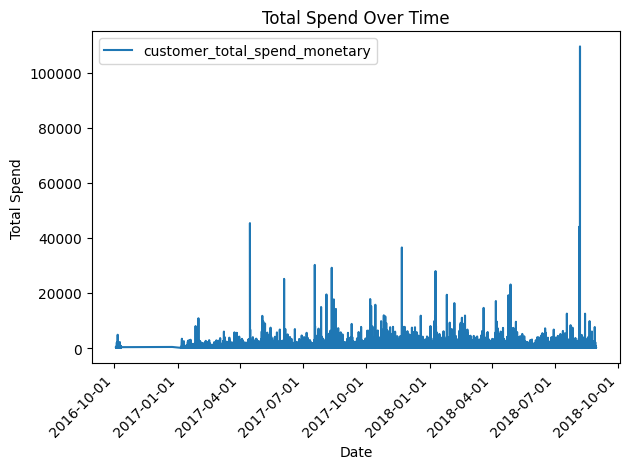

In [13]:
# Ensure the order_purchase_timestamp column is in datetime format
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# Generate the 'customer_first_purchase_date' column
clv['customer_first_purchase_date'] = df.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min')

plt.figure(figsize=(15, 10))

# Capture the AxesSubplot object returned by plot
ax = clv.groupby('customer_first_purchase_date').agg({'customer_total_spend_monetary': 'sum'}).plot()

# Format the date on x-axis
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate date labels for better readability
for label in ax.get_xticklabels():
    label.set_rotation(45)
    label.set_horizontalalignment('right')

plt.title('Total Spend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Spend')
plt.legend()
plt.tight_layout() # Adjust spacing to fit the rotated labels
plt.show()

###Order Volume Over Time <a id="order_volume_over_time"></a>


This chart shows the trend in order volume from October 2016 to mid-2018, highlighting peaks and troughs, mirroring what we saw in the previous visualization.

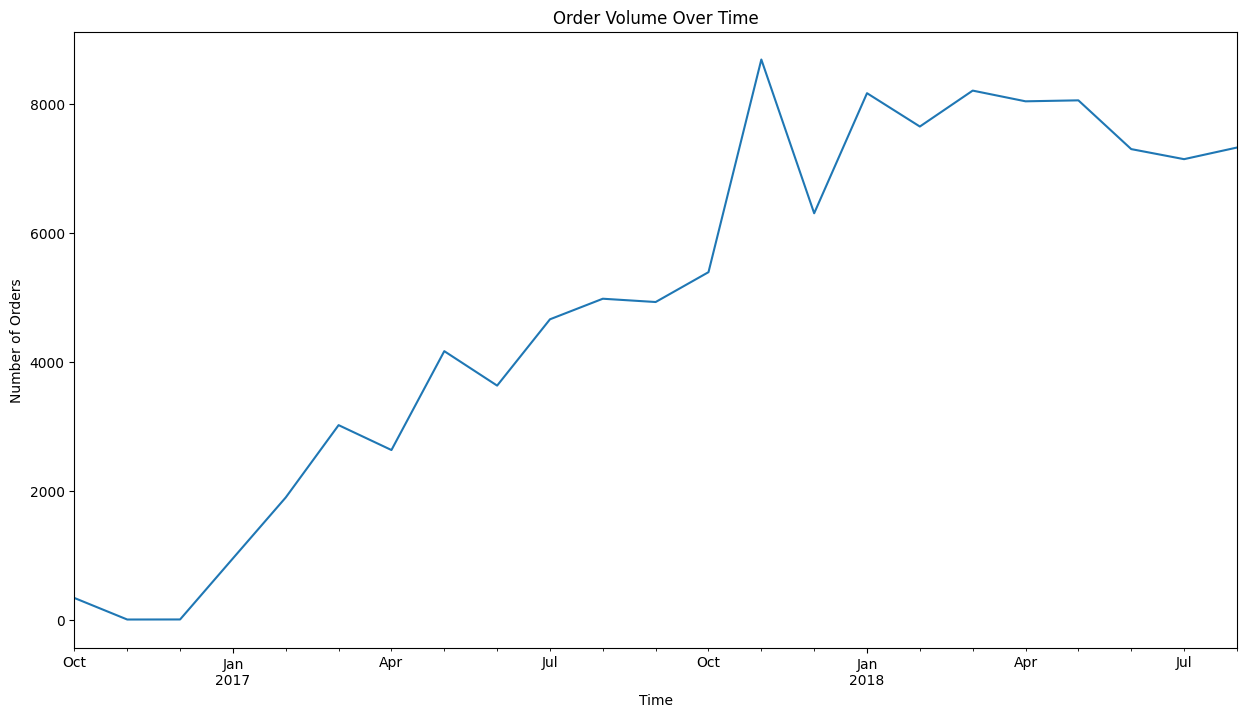

In [14]:
# Time Series Analysis
# Ensure the order_purchase_timestamp column is in datetime format
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# Plot order volume
order_volume_over_time = df.set_index('order_purchase_timestamp').resample('M').size()
plt.figure(figsize=(15, 8))
order_volume_over_time.plot()
plt.title('Order Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Orders')
plt.show()

###Preferred Payment Distribution<a id="preferred_payment"></a>

Clearly, credit card is the preferred form of payment.

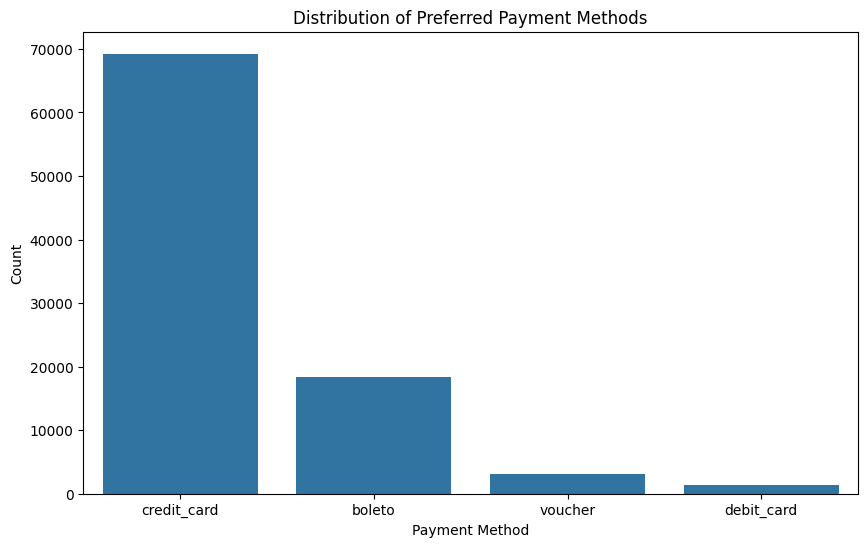

In [15]:
# Bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=clv, x='customer_preferred_payment_type')
plt.title('Distribution of Preferred Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

###Geographical Distribution<a id="geographical_distribution"></a>

Here we see the distribution of customers across different states in Brazil.
- States colored in yellow have the highest customer counts.
- States in dark purple have the lowest customer counts.

The state of São Paulo (SP) has the highest customer concentration.

Rio de Janeiro (RJ) and a few other states also have higher customer counts (colored in lighter shades), but most other states have lower customer distributions.

In [16]:
# Choropleth Map for Customer Distribution
# Customer state distribution
state_distribution = df['customer_state'].value_counts().reset_index()
state_distribution.columns = ['State', 'Count']

# URL for Brazil GeoJSON data
url = 'https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson'
response = requests.get(url)
brazil_geojson = response.json()

# Ensure that the state's ID in the GeoJSON matches the 'State' in our data
for feature in brazil_geojson['features']:
    feature['id'] = feature['properties']['name']

# Plotly Choropleth map for Brazil
fig = px.choropleth(state_distribution,
                    locations='State',
                    geojson=brazil_geojson,
                    color='Count',
                    color_continuous_scale='Viridis',
                    title='Customer Distribution by State in Brazil',
                    featureidkey='properties.sigla')  # Adjust this key based on your GeoJSON file structure

# Update the layout for a better presentation
fig.update_geos(fitbounds="locations", visible=False)

# Show the figure
fig.show()


In [17]:
# Save files as csv
clv.to_csv('/content/df_clv_eda.csv')
df.to_csv('/content/df_eda.csv')

In [18]:
# Save files to Colab Notebooks

# Define the source directory and the destination directory
source_dir = '/content/'
destination_dir = '/content/drive/My Drive/Colab Notebooks/'

# List of files to move
files_to_move = ['df_clv_eda.csv', 'df_eda.csv']

# Loop through each file and move it
for file_name in files_to_move:
    source_path = os.path.join(source_dir, file_name)

# Ensure the file exists before attempting to move it
    if os.path.exists(source_path):
        destination_path = os.path.join(destination_dir, file_name)
        shutil.move(source_path, destination_path)
        print(f"Moved {file_name} to {destination_path}")
    else:
        print(f"File {file_name} does not exist at {source_path}")

Moved df_clv_eda.csv to /content/drive/My Drive/Colab Notebooks/df_clv_eda.csv
Moved df_eda.csv to /content/drive/My Drive/Colab Notebooks/df_eda.csv


## Summary <a id="summary"></a>

The primary objective of this capstone is to accurately predict CLV for Brazil's largest online department store and involves analyzing 100,000 anonymized orders placed between 2016 and 2018, focusing on the target variable, `customer_total_spend_monetary`.

Here we used exploratory data analysis (EDA) to learn more about our data.
Initial histogram analyses reveal that most customers are low-frequency buyers with a tendency towards low average order values and limited diversity in product selections. The majority are also found to experience favorable delivery times and shipping costs. However, a small segment encounters higher costs and longer delivery times. The data further indicates that most customers rarely use financing options such as installments.

Boxplots provide a deeper understanding, showing significant outliers in customer behavior and skewness across nearly all features. Features like `customer_tenure_days` and `customer_recency_days` highlight that most customers have short tenures and made their last purchase between 100 to 350 days earlier. The feature `customer_unique_products` also indicates that most customers purchase a limited variety of products. Generally, there is a high concentration of lower-value transaction but some customers consistently buy higher-priced products, as seen in `customer_average_product_price`.

Pairplots reveal a strong linear relationship between `customer_total_spend_monetary` and `customer_average_order_value`, which aligns logically since the total spend partly depends on the order value. Notably, `customer_recency_days` shows no clear relationship with other variables, while `customer_total_orders_frequency` exhibits a positive, albeit weaker, correlation with both spending and order value. Both `customer_average_order_value` and `customer_total_spend_monetary` display right-skewed distributions, indicating lower average values for most customers and higher values for a few.

Correlation analysis using a heatmap underscores strong positive correlations between average order value, total units purchased, and total spend. Additionally, customers with longer tenures tend to exhibit higher category diversity, although higher diversity is linked with less frequent orders. There's a moderate correlation indicating higher total units leading to higher total expenditures.

An RFM Analysis (Recency, Frequency, Monetary) suggests customer segmentation into these distinct categories:

- **Loyal Customers**: These have high purchase frequency and low recency, reflecting recent purchases and strong engagement.

- **At-Risk Customers**: Identified by high recency and low frequency or substantial spending but not recent activity, posing a risk of churn.

- **Hibernating Customers**: These have high recency and low frequency, indicating infrequent and outdated purchases.

- **Big Spenders**: Recognized by large bubbles in the scatter plot, indicating high total spend, these customers are crucial due to their financial contribution.

Visualizing revenue contribution explains that the top 20% of customers are responsible for approximately 80% of total revenue. Time-based analyses show fluctuating total spend and order volume, with pronounced spikes likely attributed to marketing campaigns, seasonal factors, or promotions.

Additional explorations into payment methods highlight credit cards as the preferred choice. Geographical analysis pinpoints higher customer concentrations in states like São Paulo and Rio de Janeiro, while others exhibit lower numbers.

In summary, EDA uncovered critical insights into customer behavior and will inform how we move forward with the next stage of our analysis: Preprocessing and Training.